In [77]:
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx
from shapely import wkt
%matplotlib inline

In [78]:
df = pd.read_csv('2020_protests.csv')

In [79]:
#df.to_csv('2020_protests_aoi.csv')

In [80]:
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8478847,840,USA19983,19983,31 December 2020,2020,1,Protests,Peaceful protest,Protesters (United States),...,Los Angeles-Central,34.0693,-118.3118,1,Fox11 (Los Angeles),Subnational,"On 31 December 2020, an unreported number of f...",0,1631060772,USA
1,8641240,840,USA19989,19989,31 December 2020,2020,1,Protests,Peaceful protest,Protesters (United States),...,McAlester,34.9334,-95.7697,2,2 Works for You; News 9; KOTV6,Subnational,"On 31 December 2020, a group of people, led by...",0,1636491892,USA
2,8679807,840,USA19973,19973,31 December 2020,2020,1,Protests,Peaceful protest,Protesters (United States),...,Asheville,35.6010,-82.5540,1,Twitter; Facebook,New media,"On 31 December 2020, less than 60 people with ...",0,1638920199,USA
3,8679808,840,USA19982,19982,31 December 2020,2020,1,Protests,Peaceful protest,Protesters (United States),...,Los Angeles-Central,34.0693,-118.3118,1,CBS2 (Los Angeles); Twitter,New media-Subnational,"On 31 December 2020, an unreported number of e...",0,1638920199,USA
4,8679809,840,USA19984,19984,31 December 2020,2020,1,Protests,Peaceful protest,Protesters (United States),...,Los Angeles,34.0433,-118.2495,1,Twitter; Crowd Counting Consortium,Other-New media,"On 31 December 2020, 30-50 people marched in L...",0,1638920199,USA


In [81]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [82]:
df = df[['data_id','event_type', 'admin1', 'latitude','longitude','timestamp' ]]

In [83]:
df.rename(columns={'admin1':'state'}, inplace=True)

In [84]:
df["geometry"] = df[["longitude", "latitude"]].apply(Point, axis=1)

In [85]:
df["date"] = df[['timestamp']].apply(datetime.fromtimestamp, axis=1)

In [86]:
df.head()

,data_id,event_type,state,latitude,longitude,timestamp,geometry,date
0,8478847,Protests,California,34.0693,-118.3118,1631060772,POINT (-118.3118 34.0693),2021-09-08 00:26:12
1,8641240,Protests,Oklahoma,34.9334,-95.7697,1636491892,POINT (-95.7697 34.9334),2021-11-09 21:04:52
2,8679807,Protests,North Carolina,35.6010,-82.5540,1638920199,POINT (-82.554 35.601),2021-12-07 23:36:39
3,8679808,Protests,California,34.0693,-118.3118,1638920199,POINT (-118.3118 34.0693),2021-12-07 23:36:39
4,8679809,Protests,California,34.0433,-118.2495,1638920199,POINT (-118.2495 34.0433),2021-12-07 23:36:39


In [87]:
df = df.loc[df['state'].isin(['Florida', 
              'Georgia', 
              'South Carolina', 
              'North Carolina', 
              'Maryland', 
              'District of Columbia', 
              'Virginia', 
                              'Delaware', 
              'New Jersey', 
              'Pennsylvania', 
              'New York', 
              'Connecticut', 
              'Rhode Island', 
              'Massachusetts', 
              'Vermont', 
              'New Hampshire', 
              'Maine'])]

In [88]:
df

,data_id,event_type,state,latitude,longitude,timestamp,geometry,date
2,8679807,Protests,North Carolina,35.6010,-82.5540,1638920199,POINT (-82.554 35.601),2021-12-07 23:36:39
6,8681115,Protests,District of Columbia,38.9381,-77.0451,1638920207,POINT (-77.04510000000001 38.9381),2021-12-07 23:36:47
7,8681184,Protests,Pennsylvania,40.4406,-79.9958,1638920208,POINT (-79.9958 40.4406),2021-12-07 23:36:48
8,8681227,Protests,North Carolina,35.9940,-78.8986,1638920208,POINT (-78.8986 35.994),2021-12-07 23:36:48
9,8681256,Protests,Virginia,37.5388,-77.4336,1638920208,POINT (-77.4336 37.5388),2021-12-07 23:36:48
...,...,...,...,...,...,...,...,...
21529,7616952,Protests,North Carolina,36.0999,-80.2442,1612546518,POINT (-80.24420000000001 36.0999),2021-02-05 17:35:18
21531,7617464,Protests,New York,43.1547,-77.6155,1612546519,POINT (-77.6155 43.1547),2021-02-05 17:35:19
21534,8265777,Protests,Florida,26.7097,-80.0642,1624483201,POINT (-80.0642 26.7097),2021-06-23 21:20:01
21537,7616799,Protests,New York,43.1547,-77.6155,1612546518,POINT (-77.6155 43.1547),2021-02-05 17:35:18


In [89]:
df = df[(df["latitude"] != 42.9292) & (df["longitude"] != -85.2129)]

In [90]:
#df['month'] = df.index.month

In [91]:
df

,data_id,event_type,state,latitude,longitude,timestamp,geometry,date
2,8679807,Protests,North Carolina,35.6010,-82.5540,1638920199,POINT (-82.554 35.601),2021-12-07 23:36:39
6,8681115,Protests,District of Columbia,38.9381,-77.0451,1638920207,POINT (-77.04510000000001 38.9381),2021-12-07 23:36:47
7,8681184,Protests,Pennsylvania,40.4406,-79.9958,1638920208,POINT (-79.9958 40.4406),2021-12-07 23:36:48
8,8681227,Protests,North Carolina,35.9940,-78.8986,1638920208,POINT (-78.8986 35.994),2021-12-07 23:36:48
9,8681256,Protests,Virginia,37.5388,-77.4336,1638920208,POINT (-77.4336 37.5388),2021-12-07 23:36:48
...,...,...,...,...,...,...,...,...
21529,7616952,Protests,North Carolina,36.0999,-80.2442,1612546518,POINT (-80.24420000000001 36.0999),2021-02-05 17:35:18
21531,7617464,Protests,New York,43.1547,-77.6155,1612546519,POINT (-77.6155 43.1547),2021-02-05 17:35:19
21534,8265777,Protests,Florida,26.7097,-80.0642,1624483201,POINT (-80.0642 26.7097),2021-06-23 21:20:01
21537,7616799,Protests,New York,43.1547,-77.6155,1612546518,POINT (-77.6155 43.1547),2021-02-05 17:35:18


<Figure size 1440x1440 with 0 Axes>

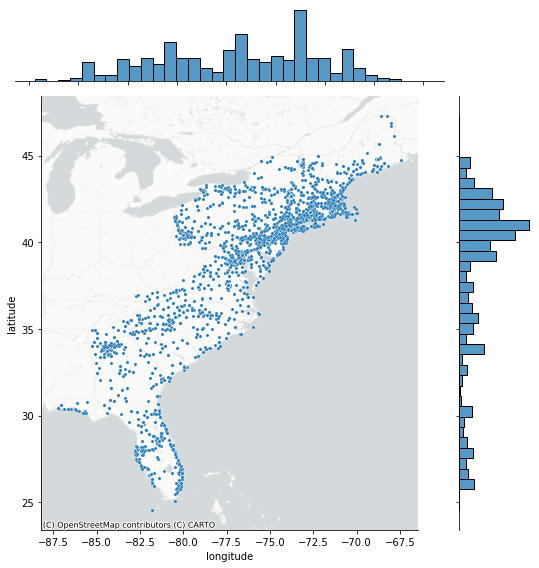

In [92]:
plt.figure(figsize=(20,20))
joint_axes = sns.jointplot(x='longitude', y='latitude', data=df, s=10, kind='scatter', height=8)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
);


<Figure size 1440x1440 with 0 Axes>

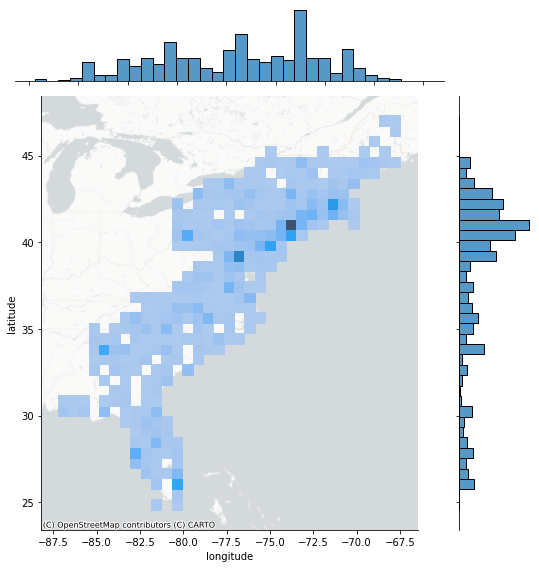

In [93]:
plt.figure(figsize=(20,20))
joint_axes = sns.jointplot(x='longitude', y='latitude', data=df, kind='hist', height=8)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
);

In [94]:
gdf = gpd.GeoDataFrame(df)

In [95]:
gdf.set_crs('epsg:4326', inplace=True)

,data_id,event_type,state,latitude,longitude,timestamp,geometry,date
2,8679807,Protests,North Carolina,35.6010,-82.5540,1638920199,POINT (-82.55400 35.60100),2021-12-07 23:36:39
6,8681115,Protests,District of Columbia,38.9381,-77.0451,1638920207,POINT (-77.04510 38.93810),2021-12-07 23:36:47
7,8681184,Protests,Pennsylvania,40.4406,-79.9958,1638920208,POINT (-79.99580 40.44060),2021-12-07 23:36:48
8,8681227,Protests,North Carolina,35.9940,-78.8986,1638920208,POINT (-78.89860 35.99400),2021-12-07 23:36:48
9,8681256,Protests,Virginia,37.5388,-77.4336,1638920208,POINT (-77.43360 37.53880),2021-12-07 23:36:48
...,...,...,...,...,...,...,...,...
21529,7616952,Protests,North Carolina,36.0999,-80.2442,1612546518,POINT (-80.24420 36.09990),2021-02-05 17:35:18
21531,7617464,Protests,New York,43.1547,-77.6155,1612546519,POINT (-77.61550 43.15470),2021-02-05 17:35:19
21534,8265777,Protests,Florida,26.7097,-80.0642,1624483201,POINT (-80.06420 26.70970),2021-06-23 21:20:01
21537,7616799,Protests,New York,43.1547,-77.6155,1612546518,POINT (-77.61550 43.15470),2021-02-05 17:35:18


In [96]:
#gdf.reset_index(inplace=True)

In [97]:
from libpysal.cg import shapely_ext

In [98]:
fl =pd.read_csv('fl.csv')
ga =pd.read_csv('ga.csv')
sc =pd.read_csv('sc.csv')
nc =pd.read_csv('nc.csv')
md =pd.read_csv('md.csv')
dc = pd.read_csv('dc.csv')
va =pd.read_csv('va.csv')
de =pd.read_csv('de.csv')
nj =pd.read_csv('nj.csv')
pa =pd.read_csv('pa.csv')
ny =pd.read_csv('ny.csv')
ct =pd.read_csv('ct.csv')
ri =pd.read_csv('ri.csv')
ma =pd.read_csv('ma.csv')
vt =pd.read_csv('vt.csv')
nh =pd.read_csv('nh.csv')
me =pd.read_csv('me.csv')

In [99]:
states = [fl,
ga,
sc,
nc,
md,
dc,
va,
de,
nj,
pa,
ny,
ct,
ri,
ma,
vt,
nh,
me]

In [100]:
east_coast = pd.concat(states)

In [101]:
east_coast.set_index('Unnamed: 0', inplace=True)

In [102]:
east_coast['geometry'] = east_coast['geometry'].apply(wkt.loads)

In [103]:
east_coast = shapely_ext.cascaded_union(east_coast['geometry'])

In [104]:
east_coast

In [105]:
#east_coast = gpd.GeoDataFrame(east_coast)

In [106]:
from shapely import wkt
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern

In [107]:
#east_coast['geometry'] = east_coast['geometry'].apply(wkt.loads)

In [108]:
#east_coast['country'] =  'united states'

In [109]:
#east_coast = east_coast.dissolve(by='country')

In [110]:
#shapely_ext.cascaded_union(polys)

In [111]:
window = Window(east_coast.parts)

In [112]:
points = df[['longitude', 'latitude']].to_numpy()

In [113]:
pp = PointPattern(points)

In [114]:
pp.summary()

Point Pattern
8388 points
Bounding rectangle [(-87.2169,24.5549), (-67.4614,47.2874)]
Area of window: 449.0919037499998
Intensity estimate for window: 18.67769142564954
         x        y
0 -82.5540  35.6010
1 -77.0451  38.9381
2 -79.9958  40.4406
3 -78.8986  35.9940
4 -77.4336  37.5388


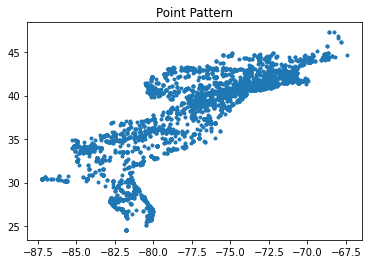

In [115]:
pp.plot()

In [116]:
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse


In [117]:
mc = mean_center(pp.points)
mc

array([-76.94158692,  37.97599096])

<Figure size 1080x1080 with 0 Axes>

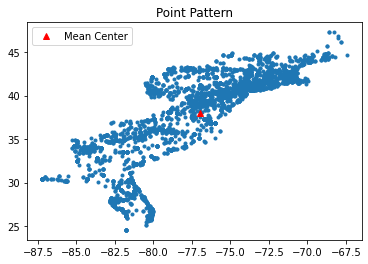

In [118]:
plt.figure(figsize=(15,15))
pp.plot()
plt.plot(mc[0], mc[1], 'r^', label='Mean Center')
plt.legend(numpoints=1)


In [119]:
stdd = std_distance(pp.points)
stdd

6.360846064477668

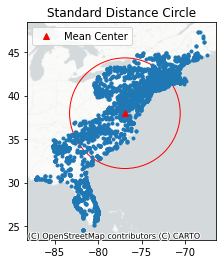

In [120]:

circle1=plt.Circle((mc[0], mc[1]),stdd, facecolor='none', edgecolor='red')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'r^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

cx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
);

In [121]:
from pointpats.distance_statistics import G, F, J, K, L, Genv, Fenv, Jenv, Kenv, Lenv

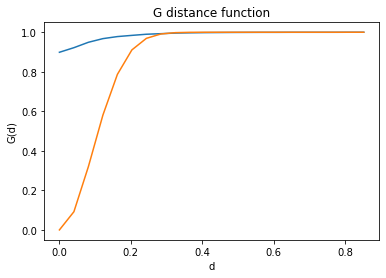

In [122]:
gp1 = G(pp, intervals=20)
gp1.plot()

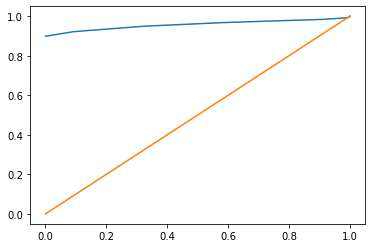

In [123]:
gp1.plot(qq=True)

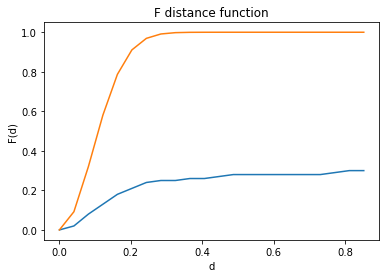

In [124]:
fp1 = F(pp, intervals=20) # The default is to randomly generate 100 points.
fp1.plot()

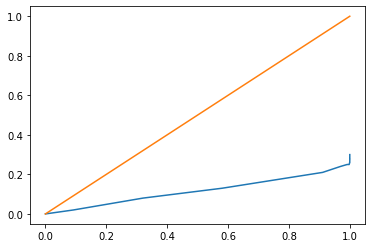

In [125]:
fp1.plot(qq=True)

/opt/conda/lib/python3.8/site-packages/pointpats/_deprecated_distance_statistics.py:239: RuntimeWarning: invalid value encountered in true_divide
  self.ev = self.j / self.j


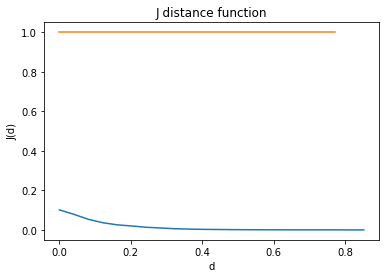

In [126]:
jp1 = J(pp, intervals=20)
jp1.plot()


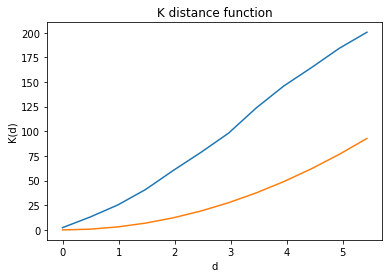

In [127]:
kp1 = K(pp)
kp1.plot()

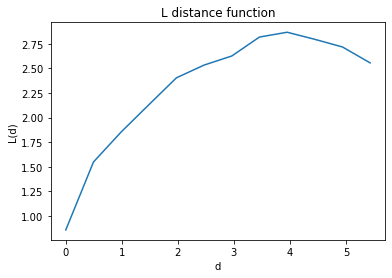

In [128]:
lp1 = L(pp)
lp1.plot()

In [129]:
realizations = PoissonPointProcess(pp.window, pp.n, 1000, asPP=True) # simulate CSR 100 times
genv = Genv(pp, intervals=20, realizations=realizations) # call Genv to generate simulation envelope
genv

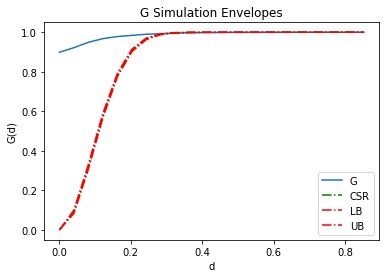

In [130]:

genv.plot()

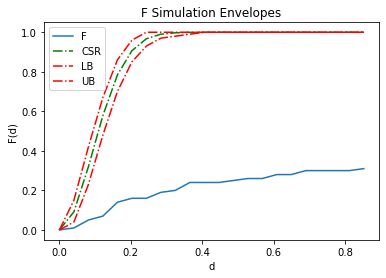

In [131]:
fenv = Fenv(pp, intervals=20, realizations=realizations)
fenv.plot()

In [132]:
#jenv = Jenv(pp, intervals=20, realizations=realizations)
#jenv.plot()

In [133]:
#kenv = Kenv(pp, intervals=20, realizations=realizations)
#kenv.plot()

In [134]:
#lenv = Lenv(pp, intervals=20, realizations=realizations)
#lenv.plot()

In [135]:
df.set_index('date', inplace = True)


<AxesSubplot:xlabel='date'>

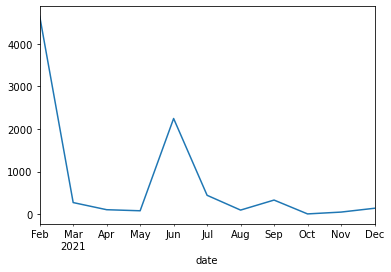

In [136]:
df.resample('1M').count()['event_type'].plot()

In [137]:
#df['month'] = df.index.month